# Практика
# xgboost, catboost(yandex), lightbm

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

# ШАГ 1
## Генерация данных

In [ ]:
n_train = 150
n_test = 1000
noise = 0.1

In [ ]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) +\
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

In [ ]:
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

## Обучение решающего дерева
- Обучите библиотечное решающее дерево на сгенерированных выше данных
- Постройте вектор предсказаний для тестовых данных
- Визуализируйте тестовые данные, обучающие данные и предсказания на одном графике, выведите среднеквадратичную ошибку

In [ ]:
tree_3 = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
tree_7 = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
tree_10 = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

pred_3 = tree_3.predict(X_test)
pred_7 = tree_7.predict(X_test)
pred_10 = tree_10.predict(X_test)

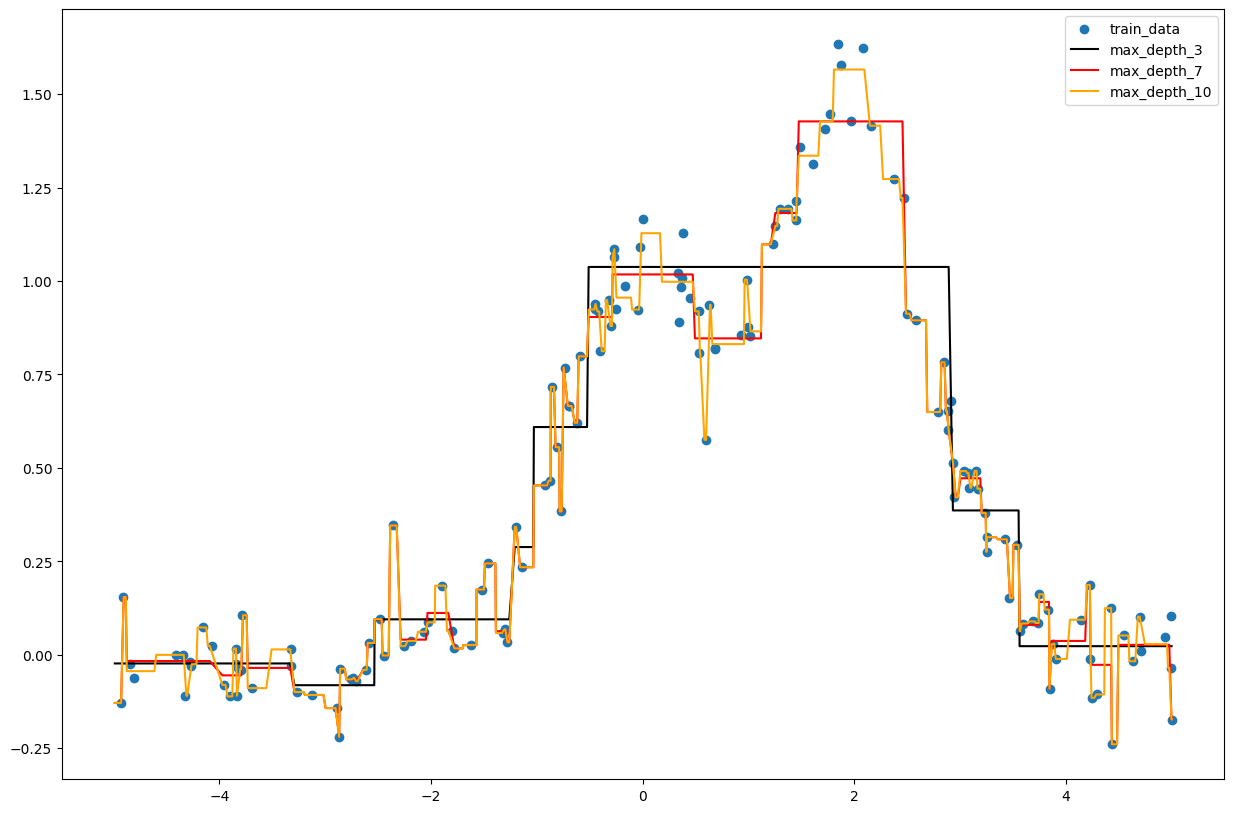

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, label='train_data')

plt.plot(X_test, pred_3, label='max_depth_3', c ='black')
plt.plot(X_test, pred_7, label='max_depth_7', c ='red')
plt.plot(X_test, pred_10, label='max_depth_10', c ='orange')

plt.legend()
plt.show()

## Градиентный бустинг
- Повторите предыдущее задание для градиентного бустинга
- Проинтерпретируйте результаты обоих шагов

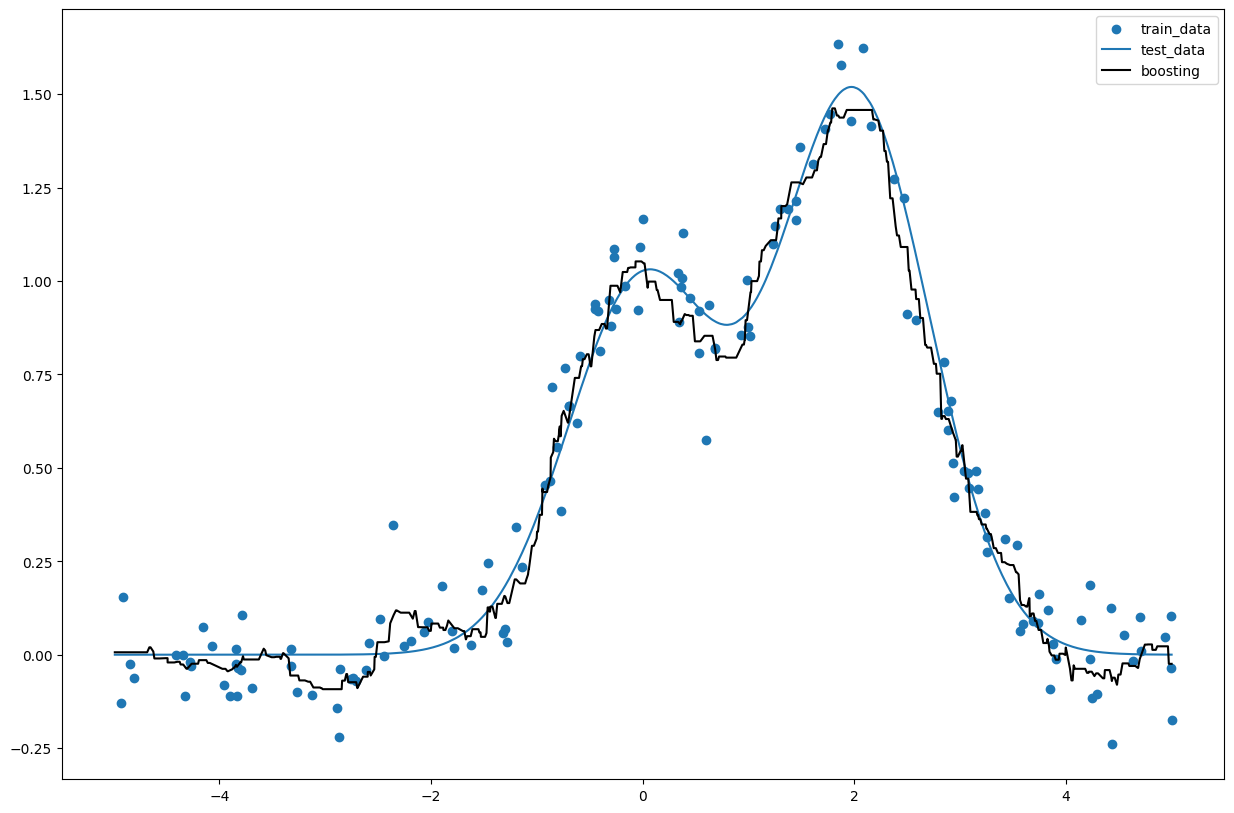

In [ ]:
gb = GradientBoostingRegressor(n_estimators=60, subsample=0.1).fit(X_train, y_train)
gb_pred = gb.predict(X_test)

plt.figure(figsize=(15,10))

plt.scatter(X_train, y_train, label='train_data')
plt.plot(X_test, f(X_test), label='test_data')
plt.plot(X_test, gb_pred, label='boosting', c ='black')

plt.legend()
plt.show()

# ШАГ 2
## Загрузка данных для практики

In [ ]:
df = pd.read_csv('telecom_data.csv')

state_enc = LabelEncoder()
df['State'] = state_enc.fit_transform(df['State'])
df['International plan'] = (df['International plan'] == 'Yes').astype('int')
df['Voice mail plan'] = (df['Voice mail plan'] == 'Yes').astype('int')
df['Churn'] = (df['Churn']).astype('int')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,19,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
1,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
2,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
3,49,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
4,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1


In [ ]:
y = df['Churn']
X = df.drop(columns=['Churn'])

In [ ]:
y.value_counts()

0    2844
1     483
Name: Churn, dtype: int64

In [ ]:
tree = DecisionTreeClassifier(max_depth=8)
cross_val_score(tree, X, y, scoring='f1').mean()

0.7684880911344253

In [ ]:
gb = GradientBoostingClassifier()
cross_val_score(gb, X, y, scoring='f1').mean()

0.8136823318829599

## Установка Xgboost

In [ ]:
!pip3 install xgboost
!pip3 install catboost
import xgboost as xgb
import catboost
import lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lgbm = lightgbm.LGBMClassifier()
cross_val_score(gb, X, y, scoring='f1').mean()

0.8137518202621177

In [ ]:
cat = catboost

In [ ]:
xgb_ = xgb.XGBClassifier()
cross_val_score(xgb_, X, y, scoring='f1').mean()

0.830283022335353

## Оптимальный бустинг
Используя решетчатый поиск, найдите оптимальные значения параметров :
- Решающего дерева (максимальная глубина),
- Xgboost (количества деревьев и максимально глубины дерева),
- AdaBoost и
- Light Gradient Boosted Machine **LightGBM**

In [ ]:
# your code here

# ШАГ 3
## Учимся работать с Xgboost
На этом шаге научимся средствами библиотеки:
- готовить обучающие и тестовые данные
- определять параметры и запускат обучение модели
- проводить кросс-валидацию
- оценивать значимость признаков

#  ШАГ 4
## Настройка параметров XGBoost
- настройте идеальное количество деревьев при высоком шаге обучения
- оптимизируйте парметры деревьев
- оптимизируйте гиперпараметры бустинга

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)


In [ ]:
params = {'max_depth': 3, 'eta': 0.2}
num_trees = 60

xgb_model = xgb.train(params, dtrain, num_trees)
y_pred = xgb_model.predict(dtest)

In [ ]:
len(y_pred), len(y_test)

In [ ]:
y_pred

array([ 1.25101969e-01, -1.94158535e-02,  7.76912749e-01,  1.83092374e-02,
        9.07636046e-01,  2.40088463e-01, -8.77432153e-03,  6.58048666e-04,
        3.71032692e-02,  9.05446708e-03,  1.69761047e-01,  7.69339688e-03,
       -1.58681031e-02,  3.80445505e-03,  9.57826257e-01,  6.20401442e-01,
        3.92885245e-02, -1.42157711e-02,  1.66462380e-02,  5.18200174e-02,
        4.31949235e-02,  2.15711799e-02,  2.06726771e-02,  1.01510072e+00,
        1.15493484e-01,  3.80767211e-02,  1.78401393e-03,  4.07664627e-02,
       -4.92687523e-02, -6.43701339e-03,  1.32449791e-02,  1.27175115e-02,
        3.57703447e-01, -3.71976495e-02,  6.32046117e-03,  4.36208904e-01,
       -2.03134120e-03,  8.32650587e-02,  9.51050162e-01,  7.60644004e-02,
        2.38200389e-02,  1.81592200e-02,  1.13172427e-01,  4.86279428e-02,
        5.08299805e-02,  1.10316515e-01,  2.96348855e-02,  7.55550563e-01,
        8.91433097e-03,  5.33375842e-03,  2.93488819e-02,  2.83071287e-02,
       -8.83350708e-03,  

In [ ]:
accuracy_score(y_test, [round(x) for x in y_pred])

0.933933933933934

**Кросс-валидация**

In [ ]:
params = {
    'max_depth': 3,
    'eta': 0.2,
    'num_tress': 60,
    'nfold': 5,
    'seed': 42
}

history = xgb.XGBClassifier(params, dtrain)
history

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `objective, use_label_encoder` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective={'eta': 0.2, 'max_depth': 3, 'nfold': 5,
                         'num_tress': 60, 'seed': 42},
              predictor=None, ...)

In [ ]:
plt.plot(history['train-mse-mean'], label='train')
plt.plot(history['test-mse-mean'], label='test')
plt.legend()
plt.show()

TypeError: ignored

Основые параметры XGBoost



*num_tees
*   max_deth
*   min_samples_split
*   min_samples_leaf
*   max_features - ограничение на кол-во фичей в дереве
*   subsample - ограничение на кол-во примеров в дереве
*   eta - learning rate
*   loss - функция ошибки
*   gamma
*   lambda
*   alpha
*   max_leaves





In [ ]:
#present params for XGB
params = {#'max_deth': np.arrange(3, 7),
        #'min_samples_split': np.array([10, 20, 30, 40, 50]),
        #'min_samples_leaf': np.array([10, 20, 30, 40, 50]),
        #'max_features': np.array([0.5, 0.6, 0.7, 0.8]),
        #'subsample': np.array([0.5, 0.6, 0.7, 0.8]),
        'eta': np.arange(0.01, 1, 0.1),
        #'gamma': np.arange(0.01, 1, 0.1),
        #'lambda': np.arange(0.01, 1, 0.1),
        #'alpha': np.arange(0.01, 1, 0.1),
        #'max_leaves': np.array([10, 20, 30, 40, 50]),
        'n_estimators': np.array([20, 40, 60])
        }

model = xgb.XGBClassifier()

gs = GridSearchCV(model, params, scoring='accuracy', cv = 4)
gs.fit(X, y)
gs.best_score_, gs.best_params_

(0.9573179903730445, {'eta': 0.11, 'n_estimators': 40})

In [ ]:
le#present params for XGB
params = {#'max_deth': np.arrange(3, 7),
        #'min_samples_split': np.array([10, 20, 30, 40, 50]),
        #'min_samples_leaf': np.array([10, 20, 30, 40, 50]),
        #'max_features': np.array([0.5, 0.6, 0.7, 0.8]),
        #'subsample': np.array([0.5, 0.6, 0.7, 0.8]),
        'eta': np.arange(0.01, 0.21, 0.01),
        #'gamma': np.arange(0.01, 1, 0.1),
        #'lambda': np.arange(0.01, 1, 0.1),
        #'alpha': np.arange(0.01, 1, 0.1),
        #'max_leaves': np.array([10, 20, 30, 40, 50]),
        'n_estimators': np.array([35, 40, 45])
        }

model = xgb.XGBClassifier()

gs = GridSearchCV(model, params, scoring='accuracy', cv = 4)
gs.fit(X, y)
gs.best_score_, gs.best_params_

(0.9588211173979451, {'eta': 0.18000000000000002, 'n_estimators': 35})

In [ ]:
#present params for XGB
params = {'max_depth': np.arange(3, 7),
        #'min_samples_split': np.array([10, 20, 30, 40, 50]),
        #'min_samples_leaf': np.array([10, 20, 30, 40, 50]),
        'subsample': np.array([0.8, 0.9, 1]),
        'eta': [0.18],
        #'gamma': np.arange(0.01, 1, 0.1),
        #'lambda': np.arange(0.01, 1, 0.1),
        #'alpha': np.arange(0.01, 1, 0.1),
        #'max_leaves': np.array([10, 20, 30, 40, 50]),
        'n_estimators': [35]
        }

model = xgb.XGBClassifier()

gs = GridSearchCV(model, params, scoring='accuracy', cv = 4)
gs.fit(X, y)
gs.best_score_, gs.best_params_

(0.9588211173979451,
 {'eta': 0.18, 'max_depth': 6, 'n_estimators': 35, 'subsample': 1.0})

# ШАГ 5
## Установка catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

cat_train = Pool(data=X_train, label=y_train)
cat_test =  Pool(data=X_test, label=y_test)


# Опишите алгоритм использования бустинга

In [ ]:
alphabet = ['аворт']

c = 0
for _1 in alphabet:
    for _2 in alphabet:
        for _3 in alphabet:
            for _4 in alphabet:
                for _5 in alphabet:
                    for _6 in alphabet:
                        c += 1
                        print(_1  + _2 + _3 + _4 + _5 + _6)
                        if (_1  + _2 + _3 + _4 + _5 + _6) == 'ворота':
                            print(c)
                            break

авортавортавортавортавортаворт


In [ ]:
town = ['Сочи', 'Питер']
price = [6, 18]
ax.bar(town, price)

NameError: ignored